# Densidades de probabilidad (probability density functions) y autovectores

Como queremos que ipython muestre en el mismo notebook las gráficas que se vayan generando (modo inline) en vez de en una ventana separada, incluimos la línea *%matplotlib inline*.
Justo a continuación importamos las librerías que necesitaremos junto al archivo *pdfs_aux.py* donde se implementan funciones auxiliares.

Recuerda que para ejecutar el código de cada celda en modo notebook hay que situarse en ella y hacer (*shift + enter*)

In [0]:
COLAB = True

In [0]:
# por Manuel Sánchez-Montañés

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pandas as pd

if COLAB:
    from urllib.request import urlretrieve
    urlretrieve("https://drive.google.com/uc?export=download&id=1IjiGVnNRFdDDkG83m7V4fYBHfYhsr0Nf",
                "pdfs_aux.py")
import pdfs_aux

%matplotlib inline

## Densidades de probabilidad en una dimensión: gausiana 1D

$\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)}
\end{equation}$

$p(x)$: densidad de probabilidad (**no probabilidad**) en el punto $x$

$\mu$: media de la distribución

$\sigma^2$: varianza de la distribución. Su raíz cuadrada es la desviación estándar.

Media observada (estimada experimentalmente): $\begin{equation}
\tilde \mu = \frac{1}{N} \sum x_i
\end{equation}$

Varianza observada (estimada experimentalmente): $\begin{equation}
\tilde {\sigma^2} = \frac{1}{N-1} \sum (x_i - \tilde \mu)^2
\end{equation}$

media observada: 1.9980188285275058 
var observada: 0.039940589940135454


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


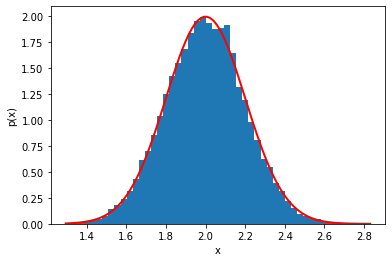

In [4]:
N = 10000
mu_teorica  = 2
var_teorica = 0.04

# genero N puntos de acuerdo a esa ditribución
X = np.random.normal(loc=mu_teorica, scale = np.sqrt(var_teorica), size=N)

# computo la media y varianza observadas en esa muestra
mu_observada, var_observada = X.mean(), X.var()
print("media observada:", mu_observada, "\nvar observada:", var_observada)

# dibujo el histograma (obtenido con los datos observados) y lo comparo con el pdf teórico
plt.hist(X, 50, normed=True)
xspan = np.linspace(np.min(X),np.max(X),100)
aux = stats.norm(mu_teorica,np.sqrt(var_teorica))
plt.plot(xspan, aux.pdf(xspan), 'r', lw=2)
plt.xlabel('x')
plt.ylabel('p(x)')

plt.show()


## Densidades de probabilidad en dos dimensiones: gausiana 2D

La siguiente ecuación es válida para cualquier número de dimensiones d:

$\begin{equation}
p(\bf x) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp{\left( - \frac{1}{2} (\bf x - \bf \mu)^T \cdot {\Sigma}^{-1} \cdot (\bf x - \bf \mu) \right)}
\end{equation}$

$p(\bf x)$: densidad de probabilidad en el punto (**vector**) $\bf x$

$\bf \mu$: media de la distribución (vector)

$\Sigma$: matriz de covarianza de la distribución. Es simétrica y cuadrada, con dimensión d (número de dimensiones de $\bf x$). Sus autovectores son los ejes principales de la distribución. Sus autovalores, las varianzas en esos ejes.

$|\Sigma|$: determinante de la matriz de covarianza. $\Sigma^{-1}$: matriz inversa de la matriz de covarianza. 


Media observada (estimada experimentalmente): $\begin{equation}
\tilde{\bf \mu} = \frac{1}{N} \sum \bf{x_i}
\end{equation}$

Matriz de covarianza observada (estimada experimentalmente): $\begin{equation}
\tilde \Sigma_{jk} = \frac{1}{N-1} \sum (x^j_i - {\tilde \mu}^j) \cdot (x^k_i - {\tilde \mu}^k)
\end{equation}$

donde $x^j_i$ es el componente j del ejemplo $i$, y ${\tilde \mu}^j$ es el componente j del vector media.

--------------------------------------------------------
Datos experimentales: 
--------------------------------------------------------
Media:
[0.00325683 0.01626987]
--------------------------------------------------------
Matriz de covarianzas:
[[0.31449155 0.41444283]
 [0.41444283 0.80451465]]
--------------------------------------------------------
Autovalores: 
[1.04095249 0.07805371]
--------------------------------------------------------
Matriz de autovectores (en columnas): 
[[-0.49552797 -0.86859198]
 [-0.86859198  0.49552797]]
--------------------------------------------------------


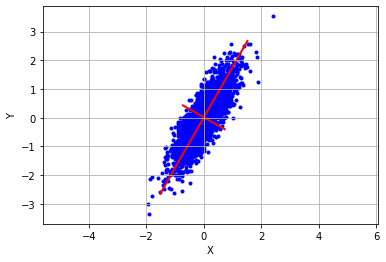

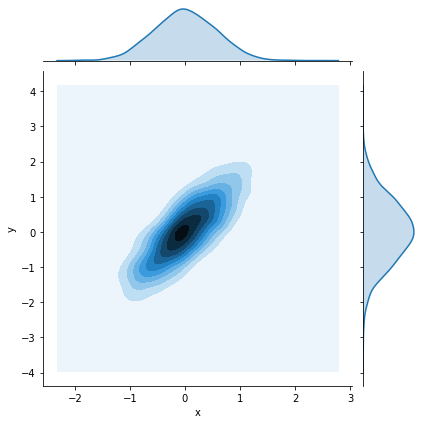

In [7]:
X = pdfs_aux.genera_puntos_gausiana2D(2000,[0,0],1,0.08,60)
# argumentos: número de puntos, media (2D), varianza en el primer eje, en el segundo, y ángulo de
#             rotación en grados (en sentido contrario al de las agujas del reloj)

pdfs_aux.visualiza_nube2D(X)

df = pd.DataFrame(X, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, kind="kde")

**Nota:** Los ejes principales de la distribución se dibujan con segmentos rojos. La anchura de estos segmentos es proporcional a la desviación estándar en ese eje (raíz cuadrada de la varianza en ese eje, que coincide con el autovalor de ese eje).

--------------------------------------------------------
Datos experimentales: 
--------------------------------------------------------
Media:
[0.99789569 1.99569292]
--------------------------------------------------------
Matriz de covarianzas:
[[ 0.08599079 -0.00132553]
 [-0.00132553  0.08415525]]
--------------------------------------------------------
Autovalores: 
[0.08668527 0.08346077]
--------------------------------------------------------
Matriz de autovectores (en columnas): 
[[ 0.88579079  0.46408477]
 [-0.46408477  0.88579079]]
--------------------------------------------------------


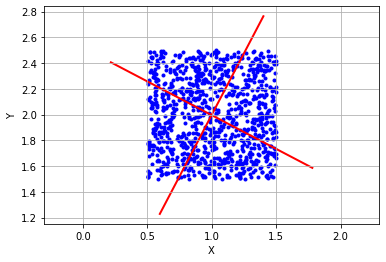

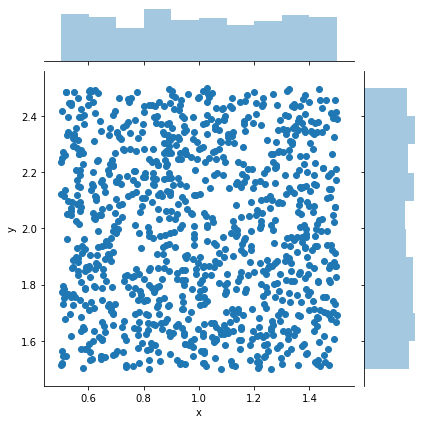

In [10]:
X = pdfs_aux.genera_puntos_cuadrado2D(1000,[1,2],1,1,0)
# argumentos: número de puntos, media (2D), anchura en el primer eje, en el segundo, y ángulo de
#             rotación en grados (en sentido contrario al de las agujas del reloj)
pdfs_aux.visualiza_nube2D(X)

df = pd.DataFrame(X, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df)

--------------------------------------------------------
Datos experimentales: 
--------------------------------------------------------
Media:
[0.9638496  1.99535476]
--------------------------------------------------------
Matriz de covarianzas:
[[8.25496615 0.01787648]
 [0.01787648 7.75170876]]
--------------------------------------------------------
Autovalores: 
[8.25560035 7.75107456]
--------------------------------------------------------
Matriz de autovectores (en columnas): 
[[ 0.99937129 -0.03545452]
 [ 0.03545452  0.99937129]]
--------------------------------------------------------


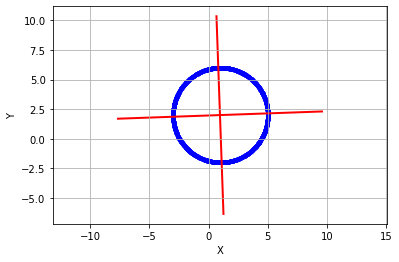

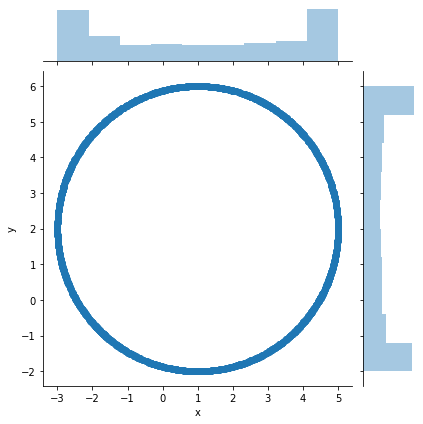

In [13]:
X = pdfs_aux.genera_puntos_circulo(2000,[1,2],4,4)
# argumentos: número de puntos, media (2D), radio mínimo, radio máximo
pdfs_aux.visualiza_nube2D(X)

df = pd.DataFrame(X, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df)

## Relación entre covarianza y correlación

La matriz de correlación R es una matriz en la que el componente j,k es la correlación lineal entre los componentes j y k de los datos. Se cumple:

$\begin{equation}
R_{jk} = \frac{\Sigma_{jk}}{\sqrt{\Sigma_{jj} \cdot \Sigma_{kk}}}
\end{equation}$

O, de otra forma:

$\begin{equation}
\Sigma_{jk} = \sigma_j \sigma_k R_{jk}
\end{equation}$

donde $\sigma_j$ y $\sigma_k$ son las desviaciones estándar en las dimensiones j y k.

Por tanto, ambas matrices coinciden sólo si todos los componentes tienen desviación estándar 1. Esto se puede lograr estandarizando las variables (restándole a cada una su media y dividiendo entre su desviación estándar original).

In [0]:
X = pdfs_aux.genera_puntos_gausiana2D(2000,[2,2],4,1,50)

In [15]:
cov = np.cov(X.T)
print("Matriz de covarianza:\n", cov)

Matriz de covarianza:
 [[2.18274999 1.4994708 ]
 [1.4994708  2.76971512]]


In [16]:
R = np.corrcoef(X.T)
print("Matriz de correlación:\n", R)

Matriz de correlación:
 [[1.         0.60984359]
 [0.60984359 1.        ]]


In [17]:
std0, std1 = X[:,0].std(), X[:,1].std()

print(np.matrix([[std0*std0*R[0,0], std0*std1*R[0,1]], [std1*std0*R[1,0], std1*std1*R[1,1]]]))

[[2.18165862 1.49872107]
 [1.49872107 2.76833027]]


In [18]:
from sklearn.preprocessing import StandardScaler

estandarizador = StandardScaler().fit(X)
Xprima = estandarizador.transform(X)

cov_xprima = np.cov(Xprima.T)
print("Matriz de covarianza:\n", cov_xprima, "\n")

R_xprima = np.corrcoef(Xprima.T)
print("Matriz de correlación:\n", R_xprima)

Matriz de covarianza:
 [[1.00050025 0.61014867]
 [0.61014867 1.00050025]] 

Matriz de correlación:
 [[1.         0.60984359]
 [0.60984359 1.        ]]
